# Problem Transformation - Doc2Vec

This notebook discusses Multi-label classificaon methods for the [academia.stackexchange.com](https://academia.stackexchange.com/) data dump in [Doc2Vec](https://radimrehurek.com/gensim_3.8.3/models/doc2vec.html) representation.

## Table of Contents
* [Data import](#data_import)
* [Data preparation](#data_preparation)
* [Methods](#methods)
* [Evaluation](#evaluation)

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from joblib import dump, load
from pathlib import Path
from academia_tag_recommender.definitions import MODELS_PATH
from academia_tag_recommender.classifier import Classifier, available_classifier_paths

DATA_FOLDER = Path(MODELS_PATH) / 'classifier' / 'multi-label'
RANDOM_STATE = 0

<a id='data_import'/>

## Data import

In [2]:
from academia_tag_recommender.data import documents
from academia_tag_recommender.test_train_data import get_y, get_test_train_data

def get_X():
     return np.vstack([document.text for document in documents])

y = get_y()
X_train, X_test, y_train, y_test = get_test_train_data(get_X(), y, scale=False)
print('Train set with shape ', X_train.shape)
print('Test set with shape', X_test.shape)

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Train set with shape  (24812, 1)
Test set with shape (8270, 1)


<a id='data_preparation'/>

## Data Preparation

In [3]:
from academia_tag_recommender.embedded_data import doc2vec

In [4]:
X_train, X_test = doc2vec(X_train, X_test, y)

[TaggedDocument(words=['can', 'find', 'impact', 'factor', 'given', 'journal', 'title', 'journals', 'provide', 'impact', 'factor', 'homepage', 'don', 'can', 'find', 'impact', 'factor'], tags=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))]
[['kind', 'visa', 'required', 'work', 'academia', 'japan', 'title', 'kind', 'visa', 'class', 'apply', 'order', 'work', 'academic', 'japan']]


In [5]:
from academia_tag_recommender.preprocessing_definition import PreprocessingDefinition
preprocessing = PreprocessingDefinition('doc2vec', 'basic', 'basic', 'english', '1,1', 'None')

def create_classifier(classifier, name=False):
    clf = Classifier(classifier, preprocessing, name)
    clf.fit(X_train, y_train)
    clf.score(X_test, y_test)
    path = clf.save('doc2vec')
    print('Training: {}s'.format(clf.training_time))
    print('Test: {}s'.format(clf.test_time))
    clf.evaluation.print_stats()

<a id='methods'/>

## Methods

* [Problem Transformation](#problem_transformation)
* [Algorithm Adaption](#algorithm_adaption)
* [Ensembles](#ensembles)

<a id='problem_transformation'/>

### Problem Transformation

- [DecisionTreeClassifier](#decisiontree)
- [ExtraTreeClassifier](#extratree)
- [KNeighborsClassifier](#kNN)
- [RadiusNeighborsClassifier](#rNN)
- [MLPClassifier](#mlp)
- [RidgeClassifierCV](#ridge)
- [MultioutputClassifier](#multioutput)
- [Classwise Classifier](#classwise)
- [Classifier Chain](#chain)
- [Label Powerset](#label_powerset)

<a id='decisiontree'/>

**DecisionTreeClassifier** [source](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

In [6]:
from sklearn.tree import DecisionTreeClassifier

create_classifier(DecisionTreeClassifier(random_state=RANDOM_STATE), 'DecisionTreeClassifier')

Training: 86.79030346870422s
Test: 0.06382155418395996s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.02437663081524852      0.0032648125755743653    0.10159411527609835      0.09807335751713019      0.09132780560833764      
micro                                                            0.0975124838172739       0.10094289953572967      0.09919804331977142      
macro                                                            0.03162509420324719      0.03286814149579429      0.032146348588432315     


<a id='extratree'/>

**ExtraTreeClassifier** [source](https://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html#sklearn.tree.ExtraTreeClassifier)

In [7]:
from sklearn.tree import ExtraTreeClassifier

create_classifier(ExtraTreeClassifier(random_state=RANDOM_STATE), 'ExtraTreeClassifier')

Training: 1.7574729919433594s
Test: 0.05283331871032715s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.024561827785909755     0.002297460701330109     0.08684401451027812      0.08251309955663039      0.07752499952016276      
micro                                                            0.08372136776256997      0.08519599865983822      0.08445224652464774      
macro                                                            0.027770449383723174     0.027448830811399712     0.02749975085357061      


<a id='kNN'/>

**KNeighborsClassifier** [source](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

create_classifier(KNeighborsClassifier(), 'KNeighborsClassifier')

Training: 0.9981448650360107s
Test: 88.12344861030579s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013443008973461465     0.042926239419588876     0.11100362756952842      0.05230753728335348      0.0669243392641216       
micro                                                            0.4527138157894737       0.05269707557555162      0.09440514469453377      
macro                                                            0.15202971959499245      0.015237550454855904     0.025627878757185415     


<a id='rNN'/>

**RadiusNeighborsClassifier** [source](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html#sklearn.neighbors.RadiusNeighborsClassifier)

In [9]:
from sklearn.neighbors import RadiusNeighborsClassifier

create_classifier(RadiusNeighborsClassifier(outlier_label='most_frequent'), 'RadiusNeighborsClassifier')

Training: 1.0312473773956299s
Test: 59.486666202545166s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.01334500095462356      0.039177750906892385     0.0007658202337767029    0.0006086255542120113    0.0005844417573559049    
micro                                                            0.09574468085106383      0.0004307662853587326    0.0008576737980654691    
macro                                                            0.026754385964912284     0.00032231413997540955   0.0006326770298238736    


<a id='mlp'/>

**MLPClassifier** [source](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

In [10]:
from sklearn.neural_network import MLPClassifier

create_classifier(MLPClassifier(random_state=RANDOM_STATE), 'MLPClassifier')

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training: 139.15686774253845s
Test: 0.10172772407531738s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012800229109654426     0.05380894800483676      0.2324727932285369       0.12436719064893188      0.15126149210187903      
micro                                                            0.5895316804407713       0.12291198008902503      0.20341399659392448      
macro                                                            0.27986550565958473      0.05895047760552704      0.08859735642124547      


<a id='ridge'/>

**RidgeClassifierCV** [source](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifierCV.html#sklearn.linear_model.RidgeClassifierCV)

*TODO: implementation needs to be adjusted for different prediction format: `[125 278 302 ...  80  64 158]`*

In [11]:
from sklearn.linear_model import RidgeClassifierCV

#create_classifier(RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]))

<a id='multioutput'/>

**MultioutputClassifier** [source](https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html#sklearn.multioutput.MultiOutputClassifier)

MultiouputClassifier transforms sklearn classifier into classifiers capable of Binary Relevence.

In [12]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC

create_classifier(MultiOutputClassifier(LinearSVC(random_state=RANDOM_STATE)), 'MultioutputClassifier(LinearSVC)')

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of 

Training: 967.512752532959s
Test: 0.7023582458496094s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012839686883472284     0.04885126964933494      0.1255521966948811       0.061948810963321235     0.07822325867065891      
micro                                                            0.6938444924406048       0.06150385296510793      0.11299186634425147      
macro                                                            0.1959264531542735       0.025447125769066294     0.04044237342201633      


In [13]:
from sklearn.linear_model import LogisticRegression

create_classifier(MultiOutputClassifier(LogisticRegression(random_state=RANDOM_STATE)), 'MultioutputClassifier(LogisticRegression)')

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Training: 71.03373622894287s
Test: 0.9235408306121826s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012967606440526953     0.05006045949214027      0.16583405745134885      0.09256146715034261      0.10958470791602593      
micro                                                            0.5758732022307015       0.09390705020820371      0.1614814814814815       
macro                                                            0.2563469675342644       0.04516475441420587      0.07170222489287494      


<a id='classwise'/>

**Classwise Classifier**

In [14]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score

scorer = make_scorer(accuracy_score)

In [15]:
from academia_tag_recommender.classwise_classifier import ClasswiseClassifier, ClassifierOption

classifier_options = [ClassifierOption(LinearSVC(random_state=RANDOM_STATE), grid_search=True, parameter={'C':[0.1, 0.5, 1, 5, 10]}),
                      ClassifierOption(LogisticRegressionCV(Cs=[0.1, 0.5, 1, 5, 10], random_state=RANDOM_STATE, max_iter=2000, scoring=scorer))]
                      #ClassifierOption(RandomForestClassifier(random_state=RANDOM_STATE))]

create_classifier(ClasswiseClassifier(classifier_options), 'ClasswiseClassifier')

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of 

Training: 14447.26459145546s
Test: 3.4372215270996094s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012766499077197225     0.051148730350665056     0.1588452237001209       0.07977025392986697      0.09995614287633633      
micro                                                            0.6670677898114721       0.0795960369501747       0.14222184212776876      
macro                                                            0.172638322274783        0.03208866016578645      0.048520673700669495     


<a id='chain'/>

**Classifier Chain** [source](http://scikit.ml/api/skmultilearn.problem_transform.cc.html#skmultilearn.problem_transform.ClassifierChain)

<cite>[Read et al., 2011][1]</cite>

[1]: https://doi.org/10.1007/s10994-011-5256-5

In [16]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.svm import LinearSVC

create_classifier(ClassifierChain(classifier=LinearSVC(random_state=RANDOM_STATE)), 'ClassifierChain(LinearSVC)')

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of 

Training: 696.5380339622498s
Test: 2.393749237060547s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.0127773181442118       0.049334945586457075     0.1502378073357517       0.07465739621120515      0.09376432314159039      
micro                                                            0.6778552746294682       0.07442684152586991      0.13412688144218746      
macro                                                            0.25877520872513976      0.033658719869836456     0.05234396217770354      


In [17]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
create_classifier(ClassifierChain(classifier=LogisticRegression(random_state=RANDOM_STATE)), 'ClassifierChain(LogisticRegression)')

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Training: 119.94345831871033s
Test: 2.4235427379608154s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012993063068796537     0.05030229746070133      0.17673413178249936      0.1006751309955663       0.11840409623964643      
micro                                                            0.56304520222046         0.10194802086823337      0.17263738045064028      
macro                                                            0.26466939713259297      0.04755594734634175      0.07484768729651031      


<a id='label_powerset'/>

**Label Powerset** [source](http://scikit.ml/api/skmultilearn.problem_transform.lp.html#skmultilearn.problem_transform.LabelPowerset)

In [18]:
from skmultilearn.problem_transform import LabelPowerset

create_classifier(LabelPowerset(classifier=LinearSVC(random_state=RANDOM_STATE)), 'LabelPowerset(LinearSVC)')

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Training: 1900.483413219452s
Test: 1.6074635982513428s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.020049004009418954     0.01995163240628779      0.25335348649738004      0.17306731156791616      0.1870894032744093       
micro                                                            0.1986822674088379       0.16742449624276073      0.18171900568845945      
macro                                                            0.09368375816378045      0.08188596729536633      0.08597694850490652      


In [19]:
# Does not finish
#create_classifier(LabelPowerset(classifier=LogisticRegression(random_state=RANDOM_STATE)), 'LabelPowerset(LogisticRegression)')

<a id='Algorithm Adaption'/>

### Algorithm Adaption

- [MLkNN](#mlknn)
- [BRkNNa](#brknna)
- [BRkNNb](#brknnb)
- [MLTSVM](#mltsvm)
- [MLARAM](#mlaram)

<a id='mlknn'/>

**MLkNN** [source](http://scikit.ml/api/skmultilearn.adapt.mlknn.html#multilabel-k-nearest-neighbours)

> Firstly, for each test instance, its k nearest neighbors in the training set are identified. Then, according to statistical information gained from the label sets of these neighboring instances, i.e. the number of neighboring instances belonging to each possible class, maximum a posteriori (MAP) principle is utilized to determine the label set for the test instance.
<cite>[Zhang & Zhou, 2007][1]</cite>

[1]: https://doi.org/10.1016/j.patcog.2006.12.019

In [21]:
from skmultilearn.adapt import MLkNN

create_classifier(MLkNN(), 'MLkNN')

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


AttributeError: 'list' object has no attribute 'shape'

<a id='brknna'/>

**BRkNNa** [source](http://scikit.ml/api/skmultilearn.adapt.brknn.html#skmultilearn.adapt.brknn.BRkNNaClassifier)

> BRkNN is an adaptation of the kNN algorithm for multilabel classification that is conceptually equivalent to using the popular Binary Relevance problem transformation method in conjunction with the kNN algorithm, but |L| times faster. [L = labels]
<cite>[Spyromitros et al., 2008][2]</cite>

[2]: https://doi.org/10.1007/978-3-540-87881-0_40


>  This version of the classifier assigns the labels that are assigned to at least half of the neighbors.
<cite>[skmultilearn][3]</cite>

[3]: http://scikit.ml/api/skmultilearn.adapt.brknn.html#skmultilearn.adapt.BRkNNaClassifier

In [22]:
from skmultilearn.adapt import BRkNNaClassifier

create_classifier(BRkNNaClassifier(), 'BRkNNaClassifier')

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training: 0.8076295852661133s
Test: 54.5894935131073s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013164258893909502     0.042805320435308346     0.059310761789600965     0.024635227730753727     0.033309725341164276     
micro                                                            0.6256038647342995       0.024792992868424832     0.047695778279084756     
macro                                                            0.11687809774618471      0.006615109716316866     0.011969761323457808     


<a id='brknnb'/>

**BRkNNb** [source](http://scikit.ml/api/skmultilearn.adapt.brknn.html#skmultilearn.adapt.brknn.BRkNNbClassifier)

>  This version of the classifier assigns the most popular m labels of the neighbors, where m is the average number of labels assigned to the object’s neighbors.
<cite>[skmultilearn][4]</cite>

[4]: http://scikit.ml/api/skmultilearn.adapt.brknn.html#skmultilearn.adapt.BRkNNbClassifier

In [23]:
from skmultilearn.adapt import BRkNNbClassifier

create_classifier(BRkNNbClassifier(), 'BRkNNbClassifier')

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


AttributeError: 'list' object has no attribute 'shape'

<a id='mltsvm'/>

**MLTSVM** [source](http://scikit.ml/api/skmultilearn.adapt.mltsvm.html#skmultilearn.adapt.MLTSVM)

<cite>[Chen et al., 2016][5]</cite>

> Twin multi-Label Support Vector Machines
<cite>[skmultilearn][6]</cite>

[5]: https://doi.org/10.1016/j.patcog.2015.10.008
[6]: http://scikit.ml/api/skmultilearn.adapt.mltsvm.html#skmultilearn.adapt.MLTSVM

In [24]:
from skmultilearn.adapt import MLTSVM

# TODO(FIX): executes with error
#create_classifier(MLTSVM(c_k = 2**-1), 'MLTSVM()')

<a id='mlaram'/>

**MLARAM** [source](http://scikit.ml/api/skmultilearn.adapt.mlaram.html#skmultilearn.adapt.MLARAM)

> an extension of fuzzy Adaptive Resonance Associative Map (ARAM) – an Adaptive Resonance Theory (ART)based neural network. It aims at speeding up the classification process in the presence of very large data.
<cite>[F. Benites & E. Sapozhnikova, 2015][7]</cite>

[7]: https://doi.org/10.1109/ICDMW.2015.14

In [25]:
from skmultilearn.adapt import MLARAM

create_classifier(MLARAM(), 'MLARAM')

AttributeError: 'list' object has no attribute 'max'

<a id='ensembles'/>

### Ensembles

- [ExtraTreesClassifier](#extra_trees)
- [RandomForestClassifier](#random_forest)
- [RAkELo](#rakelo)
- [RAkELd](#rakeld)
- [MajorityVotingClassifier](#majority_voting)
- [LabelSpacePartitioningClassifier](#label_space)

<a id='extra_trees'/>

**ExtraTreesClassifier** [source](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier)

In [39]:
from sklearn.ensemble import ExtraTreesClassifier

create_classifier(ExtraTreesClassifier(random_state=RANDOM_STATE))

Training: 195.9423828125s
Test: 19.986154556274414s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013289632788137211     0.03978234582829504      0.0035066505441354295    0.001271664651350262     0.0018137847642079807    
micro                                                            0.6170212765957447       0.0013880246972670272    0.0027698185291308497    
macro                                                            0.020090744101633393     0.00020849947360973656   0.0004101324790445081    


<a id='random_forest'/>

**RandomForestClassifier** [source](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

In [40]:
from sklearn.ensemble import RandomForestClassifier

create_classifier(RandomForestClassifier(random_state=RANDOM_STATE))

Training: 640.1380569934845s
Test: 10.579882144927979s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.01327244956405524      0.04062877871825877      0.01154776299879081      0.004925433293027005     0.006619450682328554     
micro                                                            0.6144578313253012       0.004882017900732303     0.00968706966142742      
macro                                                            0.0187719298245614       0.0007150236839919846    0.0013720336674424955    


<a id='rakelo'/>

**RAkELo** [source](http://scikit.ml/api/skmultilearn.ensemble.rakelo.html#skmultilearn.ensemble.RakelO)

> Rakel: randomly breaking the initial set of labels into a number of small-sized labelsets, and employing [Label powerset] to train a corresponding multilabel classifier.
<cite>[Tsoumakas et al., 2011][1]</cite>


> Divides the label space in to m subsets of size k, trains a Label Powerset classifier for each subset and assign a label to an instance if more than half of all classifiers (majority) from clusters that contain the label assigned the label to the instance.
<cite>[skmultilearn][2]</cite>


[1]: https://doi.org/10.1109/TKDE.2010.164
[2]: http://scikit.ml/api/skmultilearn.ensemble.rakelo.html#skmultilearn.ensemble.RakelO

In [27]:
from skmultilearn.ensemble import RakelO
from sklearn.svm import LinearSVC

create_classifier(RakelO(
    base_classifier=LinearSVC(random_state=RANDOM_STATE),
    model_count=y_train.shape[1]
))

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of 

Training: 4569.950880765915s
Test: 122.11617064476013s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012939604149430408     0.04691656590084643      0.10542926239419588      0.05010882708585248      0.06408533425462083      
micro                                                            0.6810845706907682       0.05049538122816254      0.09402014080741468      
macro                                                            0.14391943252200118      0.013723442491285608     0.022882186591055124     


In [28]:
from sklearn.linear_model import LogisticRegression

create_classifier(RakelO(
    base_classifier=LogisticRegression(random_state=RANDOM_STATE),
    model_count=y_train.shape[1]
))

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Training: 499.07825565338135s
Test: 129.6031084060669s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.01299051740596958      0.04873035066505441      0.16575374578397556      0.09182587666263602      0.10908189888842851      
micro                                                            0.5709648863971674       0.0926147513521275       0.15937731653076354      
macro                                                            0.25481736726349635      0.04560571822726606      0.07207915114008932      


<a id='rakeld'/>

**RAkELd** [source](http://scikit.ml/api/skmultilearn.ensemble.rakeld.html#skmultilearn.ensemble.RakelD)

>Divides the label space in to equal partitions of size k, trains a Label Powerset classifier per partition and predicts by summing the result of all trained classifiers.
<cite>[skmultilearn][3]</cite>

[3]: http://scikit.ml/api/skmultilearn.ensemble.rakeld.html#skmultilearn.ensemble.RakelD

In [29]:
from skmultilearn.ensemble import RakelD

create_classifier(RakelD(base_classifier=LinearSVC(random_state=RANDOM_STATE)))

C:\Users\Monique\anaconda3\lib\site-packages\skmultilearn\cluster\random.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(label_sets)
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to con

Training: 1521.2948400974274s
Test: 37.0413761138916s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012940240565137148     0.045707376058041115     0.1058000806126562       0.05063885530028214      0.06459895203546957      
micro                                                            0.6754385964912281       0.05159622840185708      0.09586909155587177      
macro                                                            0.1535457187221468       0.01602798547932414      0.026464791142804638     


In [30]:
create_classifier(RakelD(base_classifier=LogisticRegression(random_state=RANDOM_STATE)))

C:\Users\Monique\anaconda3\lib\site-packages\skmultilearn\cluster\random.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(label_sets)
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfg

Training: 98.63284397125244s
Test: 38.4376425743103s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013017246865652645     0.049576783555018135     0.1676252942274708       0.0941596130592503       0.11106826802110963      
micro                                                            0.5614673760851302       0.09596515579380654      0.163914323086985        
macro                                                            0.2613822322922186       0.04769411635781605      0.07493665985774767      


***Clustering***

In [33]:
from skmultilearn.cluster import LabelCooccurrenceGraphBuilder
from academia_tag_recommender.test_train_data import get_all_labels

graph_builder = LabelCooccurrenceGraphBuilder(weighted=True, include_self_edges=False)

label_names = get_all_labels()

edge_map = graph_builder.transform(y_train)
print("{} labels, {} edges".format(len(label_names), len(edge_map)))

190 labels, 7739 edges


In [34]:
from skmultilearn.cluster import IGraphLabelGraphClusterer
import igraph as ig

# we define a helper function for visualization purposes
def to_membership_vector(partition):
    return {
        member :  partition_id
        for partition_id, members in enumerate(partition)
        for member in members
    }

clusterer_igraph = IGraphLabelGraphClusterer(graph_builder=graph_builder, method='walktrap')
partition = clusterer_igraph.fit_predict(X_train, y_train)
print(partition)

colors = ['red', 'white', 'blue']
membership_vector = to_membership_vector(partition)
visual_style = {
    "vertex_size" : 20,
    "vertex_label": [x[0] for x in label_names],
    "edge_width" : [10*x/y_train.shape[0] for x in clusterer_igraph.graph_.es['weight']],
    "vertex_color": [colors[membership_vector[i]] for i in range(y_train.shape[1])],
    "bbox": (400,400),
    "margin": 80,
    "layout": clusterer_igraph.graph_.layout_circle()

}

#ig.plot(clusterer_igraph.graph_, **visual_style)

[list([0, 1, 3, 6, 7, 11, 14, 17, 19, 24, 25, 26, 27, 30, 31, 32, 36, 41, 44, 46, 50, 51, 58, 59, 63, 70, 75, 76, 77, 80, 88, 89, 90, 91, 95, 96, 97, 98, 99, 104, 110, 111, 112, 113, 114, 115, 116, 117, 120, 123, 124, 125, 132, 133, 134, 137, 139, 141, 142, 143, 145, 150, 152, 154, 156, 158, 166, 167, 172, 175, 183, 184, 187, 188, 189])
 list([2, 4, 5, 8, 9, 10, 12, 13, 15, 16, 18, 20, 21, 22, 23, 28, 29, 33, 34, 35, 37, 38, 39, 40, 42, 43, 45, 47, 48, 49, 52, 53, 54, 55, 56, 57, 60, 61, 62, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 78, 79, 81, 82, 83, 84, 85, 86, 87, 92, 93, 94, 100, 101, 102, 103, 105, 106, 107, 108, 109, 118, 119, 121, 122, 126, 127, 128, 129, 130, 131, 135, 136, 138, 140, 144, 146, 147, 148, 149, 151, 153, 155, 157, 159, 160, 161, 162, 163, 164, 165, 168, 169, 170, 171, 173, 174, 176, 177, 178, 179, 180, 181, 182, 185, 186])]


C:\Users\Monique\anaconda3\lib\site-packages\skmultilearn\cluster\igraph.py:190: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(


<a id='majority_vorting'/>

**MajorityVotingClassifier** [source](http://scikit.ml/api/skmultilearn.ensemble.voting.html#skmultilearn.ensemble.MajorityVotingClassifier)

In [35]:
from skmultilearn.ensemble.voting import MajorityVotingClassifier
from skmultilearn.problem_transform import ClassifierChain

create_classifier(MajorityVotingClassifier(
    classifier=ClassifierChain(classifier=LogisticRegression(random_state=RANDOM_STATE)),
    clusterer=clusterer_igraph
), 'MajorityVotingClassifier(ClassifierChain(LogisticRegression))')

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Training: 100.39254021644592s
Test: 5.097863435745239s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013044612741042448     0.05030229746070133      0.15102614502251746      0.08716646513502618      0.10134646355928098      
micro                                                            0.5597465298732649       0.08878571770449432      0.15326145329863264      
macro                                                            0.25605236516358465      0.0439489524659337       0.07010727023392814      


In [36]:
create_classifier(MajorityVotingClassifier(
    classifier=ClassifierChain(classifier=LinearSVC(random_state=RANDOM_STATE)),
    clusterer=clusterer_igraph
), 'MajorityVotingClassifier(ClassifierChain(LinearSVC))')

C:\Users\Monique\anaconda3\lib\site-packages\skmultilearn\cluster\igraph.py:190: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, incr

Training: 803.2592420578003s
Test: 5.587182998657227s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012831413479284669     0.04836759371221282      0.12150947198710196      0.06085247883917775      0.07620487130765245      
micro                                                            0.7031684269038355       0.060546594553199634     0.11149303719372465      
macro                                                            0.21701318950550635      0.02777848837341382      0.043784685447169555     


<a id='label_space'/>

**LabelSpacePartitioningClassifier** [source](http://scikit.ml/api/skmultilearn.ensemble.partition.html#skmultilearn.ensemble.LabelSpacePartitioningClassifier)

<cite>[Szymański et al., 2016][2]</cite>

[2]: https://doi.org/10.3390/e18080282

In [37]:
from skmultilearn.ensemble import LabelSpacePartitioningClassifier

create_classifier(LabelSpacePartitioningClassifier(
    classifier = ClassifierChain(classifier=LogisticRegression(random_state=RANDOM_STATE)),
    clusterer = clusterer_igraph
), 'LabelSpacePartitioningClassifier(ClassifierChain(LogisticRegression))')

C:\Users\Monique\anaconda3\lib\site-packages\skmultilearn\cluster\igraph.py:190: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to

Training: 99.03382539749146s
Test: 2.0146703720092773s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013044612741042448     0.05030229746070133      0.15102614502251746      0.08716646513502618      0.10134646355928098      
micro                                                            0.5597465298732649       0.08878571770449432      0.15326145329863264      
macro                                                            0.25605236516358465      0.0439489524659337       0.07010727023392814      


In [38]:
create_classifier(LabelSpacePartitioningClassifier(
    classifier = ClassifierChain(classifier=LinearSVC(random_state=RANDOM_STATE)),
    clusterer = clusterer_igraph
), 'LabelSpacePartitioningClassifier(ClassifierChain(LinearSVC))')

C:\Users\Monique\anaconda3\lib\site-packages\skmultilearn\cluster\igraph.py:190: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, incr

Training: 799.017716884613s
Test: 1.9917166233062744s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012831413479284669     0.04836759371221282      0.12150947198710196      0.06085247883917775      0.07620487130765245      
micro                                                            0.7031684269038355       0.060546594553199634     0.11149303719372465      
macro                                                            0.21701318950550635      0.02777848837341382      0.043784685447169555     


<a id='evaluation'/>

## Evaluation

In [6]:
paths = available_classifier_paths('doc2vec')
evals = []
for path in paths:
    clf = load(path)
    evaluation = clf.evaluation
    evals.append([str(clf), evaluation])

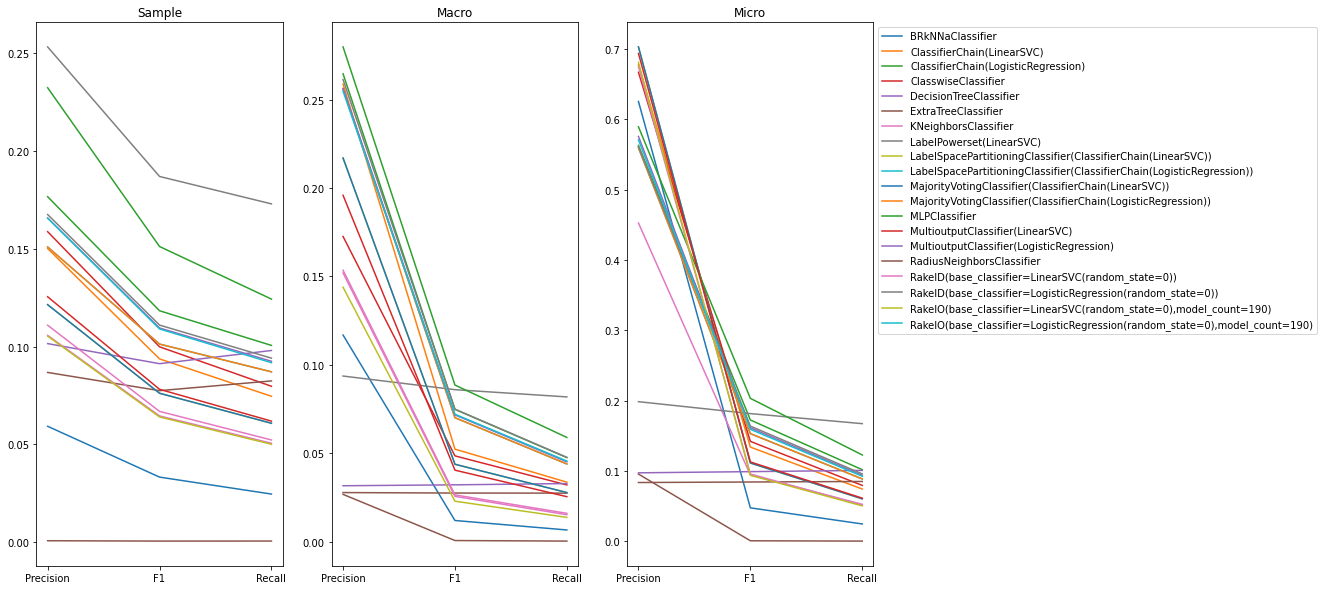

In [7]:
x_ = ['Precision', 'F1', 'Recall']
fig, axes = plt.subplots(1, 3, figsize=(15,10))
axes[0].set_title('Sample')
axes[1].set_title('Macro')
axes[2].set_title('Micro')
for eval_ in evals:
    evaluator = eval_[1]
    axes[0].plot(x_, [evaluator.precision_samples, evaluator.f1_samples, evaluator.recall_samples], label=eval_[0])
    axes[1].plot(x_, [evaluator.precision_macro, evaluator.f1_macro, evaluator.recall_macro], label=eval_[0])
    axes[2].plot(x_, [evaluator.precision_micro, evaluator.f1_micro, evaluator.recall_micro], label=eval_[0])
axes[2].legend(bbox_to_anchor=(1, 1), ncol=1)
plt.show()

In [8]:
top_3 = sorted(paths, key=lambda x: load(x).evaluation.sum(), reverse=True)[:3]

In [9]:
def per_label_accuracy(orig, prediction):
    if not isinstance(prediction, np.ndarray):
        prediction = prediction.toarray() 
    l = 1 - orig - prediction
    return np.average(l, axis=0)

In [11]:
from sklearn.metrics import classification_report
classwise_results = []
for clf_path in top_3:
    clf = load(clf_path)
    prediction = clf.predict(X_test)
    label_accuracies = per_label_accuracy(y_test, prediction)
    report = classification_report(y_test, prediction, output_dict=True, zero_division=0)
    classwise_report = {}
    for i, result in enumerate(report):
        if i < len(label_accuracies):
            classwise_report[result] = report[result]
            classwise_report[result]['accuracy'] = label_accuracies[int(result)]
    classwise_results.append((clf, classwise_report))

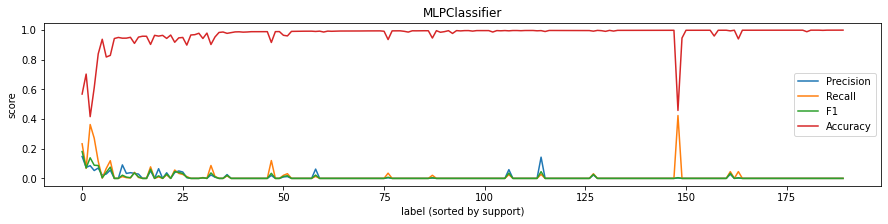

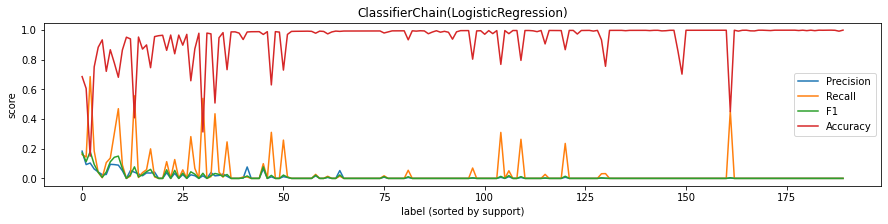

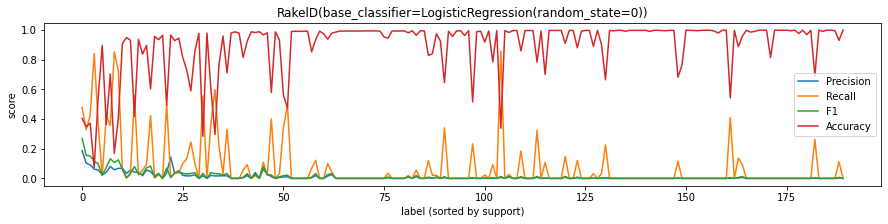

In [13]:
import numpy as np
x_ = np.arange(0, len(y_test[0]))
for classwise_result in classwise_results:
    name, results = classwise_result
    _, fig_1 = plt.subplots(figsize=(15,3))
    fig_1.set_title(name)
    sorted_results = sorted(results, key=lambda x: results[x]['support'], reverse=True)
    fig_1.plot(x_, [results[result]['precision'] for result in sorted_results], label='Precision')
    fig_1.plot(x_, [results[result]['recall'] for result in sorted_results], label='Recall')
    fig_1.plot(x_, [results[result]['f1-score'] for result in sorted_results], label='F1')
    fig_1.plot(x_, [results[result]['accuracy'] for result in sorted_results], label="Accuracy")
    fig_1.set_xlabel('label (sorted by support)')
    fig_1.set_ylabel('score')
    fig_1.legend(loc='best')
plt.show()